# **Random walk**


# Opis problemu



Poniżej przedstawiona jest implementacja algorytmu **TD(0)** do problemu **random walk**.

Diagram:

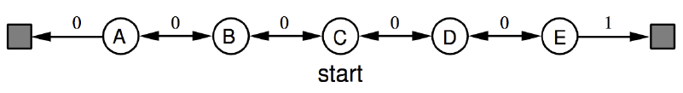

Przypomnijmy podstawowe fakty:



*   **Kółkami** oznaczone są **stany nieterminalne**, **kwadratami stany terminalne**.
*   Wszystkie **epizody rozpoczynają** się w środkowym stanie **C**.
*   W dowolnym stanie nieterminalnym **prawdopodobieństwa ruchu w lewo i ruchu w prawo** są równe i wynoszą **0.5** (to jest polityka **pi**).
*   Nad strzałkami widoczne są **wartości nagród**. Tylko przejście ze stanu **E** do **stanu terminalnego po prawej stronie** skutkuje nagrodą **R=1**. Poza tym wszystkie nagrody wynoszą **0**.

# Algorytm

Implementujemy algorytm:

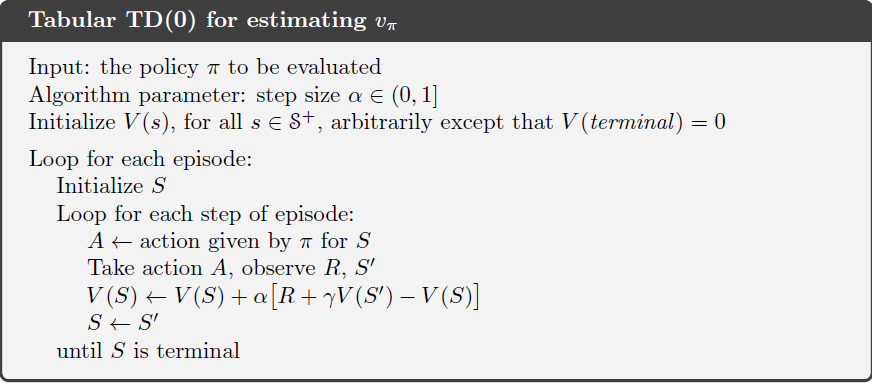

# Implementacja

Zacznijmy od importu potrzebnej biblioteki:

In [1]:
import numpy as np

**Stany** oznaczamy cyframi począwszy od lewej strony:
* Stan terminalny *z lewej strony* - **0**
* Stan A - **1**
* Stan B - **2**
* Stan C - **3**
* Stan D - **4**
* Stan E - **5**
* Stan terminalny *z prawej strony* - **6**

Wartości początkowe **V** dla wszystkich stanów:

In [2]:
V = np.zeros(7)
print(V)

[0. 0. 0. 0. 0. 0. 0.]


In [3]:
epochs = 1000 #liczb epok czyli to ile epizodów uwzględnimy w wyliczeniu V (im więcej tym lepiej)
alpha = 0.1
gamma = 1.0 #bez zdyskontowania

for i in range(epochs):
  state = 3 #stan poczatkowy w każdym epizodzie
  while True:
    #losowanie 0 lub 1: 0 ruch w lewo, 1 ruch w prawo
    if np.random.randint(2) == 0:
      next_state = state - 1
    else:
      next_state = state + 1

    #nogroda wynosi 1 przy przejściu do stanu 6, poza tym nagroda wynosi 0
    if next_state == 6:
      R = 1
    else:        
      R = 0

    #modyfikacja wartość V zgodna z TD
    V[state] = V[state] + alpha * (R + gamma*V[next_state] - V[state])
        
    state = next_state

    #Jeżeli dotarliśmy do stanu terminalnego - koniec epizodu        
    if state == 6 or state == 0:
      break

Wypiszmy wyliczone wartości **V**:

In [4]:
print(V)

[0.         0.09388091 0.35887935 0.640353   0.80156957 0.90971464
 0.        ]


Wartości **teoretyczne** podane w wykładzie (**slajd 19**):

In [5]:
print([0,1/6,2/6,3/6,4/6,5/6,0])

[0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334, 0]


# Polecenie

Przetestuj działanie powyższego algorytmu dla **3 wybranych par wartości parametrów alpha i gamma**. Podaj wyliczone wartości **V**. Skomentuj uzyskane rezultaty.

DO UZUPEŁNIENIA

In [6]:
def fun(alpha,gamma):
    V = np.zeros(7)
    epochs = 1000 #liczb epok czyli to ile epizodów uwzględnimy w wyliczeniu V (im więcej tym lepiej)
    for i in range(epochs):
        state = 3 #stan poczatkowy w każdym epizodzie
        while True:
            #losowanie 0 lub 1: 0 ruch w lewo, 1 ruch w prawo
            if np.random.randint(2) == 0:
                next_state = state - 1
            else:
                next_state = state + 1


            #nogroda wynosi 1 przy przejściu do stanu 6, poza tym nagroda wynosi 0
            if next_state == 6: #Stan terminalny z prawej strony
                R = 1
            else:
                R = 0
            #modyfikacja wartość V zgodna z TD
            V[state] = V[state] + alpha * (R + gamma*V[next_state] - V[state])
            state = next_state
            #Jeżeli dotarliśmy do stanu terminalnego - koniec epizodu
            if state == 6 or state == 0:
                break
    return V

In [14]:
print(fun(0.1,1.0))
print(fun(0.3,0.8))
print(fun(0.6,0.7))

[0.         0.18837163 0.2970215  0.46354274 0.6514013  0.83685101
 0.        ]
[0.         0.00762257 0.0325266  0.1389459  0.40100176 0.7582645
 0.        ]
[0.         0.00145046 0.00433381 0.0201605  0.22215472 0.84138605
 0.        ]


In [9]:
 W 3 przykladowych wywolaniach funkcji mozemy zauwazyc ze zmniejszenie parametru gamma spowoduje zmniejszenie oczekiwanej
wartosci V. Lecz gdy zwiekszymy parametr alpha to wartosci V sie zwiekszaja.

SyntaxError: invalid syntax (<ipython-input-9-7b2736c12bf4>, line 1)